<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/exercises_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression

Regression models are a class of statistical models that let you explore the relationship between a **categorical response variable and some explanatory variables**. That is, given some explanatory variables, you can make predictions about the value of the response variable. In our case, we will focus on a binary response variable, which allows for two outcomes (e.g., yes, no).



Let's assume we count an outcome.

**Liqourice lovers:**

Yes = 50

No = 75

$prob = \frac {50 }{100 }$ = 0.50 = 50%

$odds = \frac {50 }{75 }$ = 0.66 = 66%

When we predict the probability of the outcome occuring from a logistic regression, we do so in log odds:

It is just the log of odds:
$log \: odds = ln(0.66) = -0.41$



With this in mind,

Take a look at the formula for logistic regression:

$log(odds) [Y] = b_0 + b_1x_i + e_i$

or:

$ln(\frac {P(Y) }{1-P(Y) }) = b_0 + b_1x_i + e_i$


$b_1$ is still a change in the outcome from the unit change in the predictor, except now it is the log odds of the outcome occuring.

However, we can work with this, because we know that: 

$$ln(1) = 0$$

$$exp(0) = 1$$

Therefore, 

$exp(b) = \frac {odds \: after \:a \:unit \:change\: in \:the \:predictor}{original\: odds} $

$exp(b_0)$, the odds of outcome when predictor is 0

$exp(b_1)$ = the odds ratio associated with a unit change in the predictor

Then, we can express outcomes in terms of odds/odds ratios, and not odd logs.

These are easier to interpret, that is:

OR > 1, when the predictor goes up, so does the probability of outcome  
OR < 1, predictor goes up, and the probability of the outcome goes down

OR > 1, percentage change = (OR -1) * 100

OR < 1, percentage change = 1/OR -1) * 100 


In logistic regression, our probabilities are not linear and therefore cannot be summarized in the two variables, slope and intercept, directly. 

But by taking the log odds we can transform our probabilities into a linear format. This makes for great modelling, but poor interpretation. 

Log odds, what are they really? No one really knows, nor what to compare them. Here, we focus on reporting the odds, instead. 



**Example:**

Research has shown that we are better able to remember information that we are curious about. Here, we want to test/replicate these findings.

$H_0$ : remembering is the same whether one is curious or not

$H_a$ : remembering is better if one is curious

So, we randomly sample 200 people by giving them each a trivia question and ask them if they are curious about the answer. We record their answer as "curious" or "not curious" Then, we give them the answer.

Later, we ask them: "Do you remember what the answer is?" If they correctly remember we record this as "remembering", else we record this as "forget". Below is a table of the data.

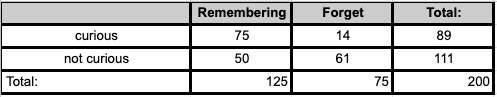

$$Odds_{remembering}:  \frac {number  \: of \: remembering}{forget}$$

$$Odds_{remembering} = \frac {125}{75}= 1.67$$

$$Odds_{remembering\:after \:curious}: \frac {remembering \:after\: curious}{forgetting \:after\: curious}$$

$$Odds_{remembering\:after \:curious}= \frac {75}{14}= 5.36$$

$$Odds_{remembering\:after\:not \:curious}: \frac {remembering \:after\:not \: curious}{forgetting \:after\: not \:curious}$$

$$Odds_{remembering\:after\:not \:curious} = \frac {50}{61}= 0.82$$

Finally, The (regression) test compares things to see if there is a difference (odds). Regression measures this difference through the rate of change (odds ratio) by jumping from not curious to curious. 

$$Odds_{ratio} = \frac {Odds  \: remembering \: after \: curious}{Odds  \: remembering \: after \: not \:curious}$$

$$Odds_{ratio} = \frac {5.36}{0.82}= 6.54$$

So the odds of remembering after being curious is 6.54 higher than the odds of remembering when not curious. 



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy


df=pd.read_csv('https://raw.githubusercontent.com/ia-nechaev/aqm2022/main/data/log_curious.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   curious      200 non-null    int64
 1   remembering  200 non-null    int64
 2   mood         200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [ ]:
#The interpretation is valid, but log odds is not intuitive in it's interpretation. 
#C(curious) is how we express a categorical predictor

log_odds_curious = smf.logit("remembering ~ C(curious)",
        data = df).fit()

log_odds_curious.summary()




Optimization terminated successfully.
         Current function value: 0.575618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.1299
Time:                        16:38:53   Log-Likelihood:                -115.12
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 4.538e-09
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1989      0.191     -1.042      0.297      -0.573       0.175
C(curious)[T.1]     1.8773      0.348      5.393      0.000       1.195       2.559
===================================================================================
"""

In [ ]:
print(log_odds_curious.params)

Intercept         -0.198851
C(curious)[T.1]    1.877282
dtype: float64


**How do we interpret these log odd ratios? Its hard.**

But we can convert these $b_0$ and $b_1$ our log odds to odd ratios by using the $exp(b_0)$ and $exp(b_1)$

In [ ]:

#Let's convert this to odds ratio and interpret the model again. 
#remember the equation above:
#To convert the log odds coefficients and confidence intervals, one needs to take the exponential of the values.


odds_ratio_curious = pd.DataFrame(np.exp(log_odds_curious.params), columns= ['OR'])
odds_ratio_curious['z-value']= log_odds_curious.tvalues
odds_ratio_curious['p-values']=log_odds_curious.pvalues
odds_ratio_curious[['2.5%', '97.5%']] = np.exp(log_odds_curious.conf_int())

odds_ratio_curious

,OR,z-value,p-values,2.5%,97.5%
Intercept,0.819672,-1.042356,2.972468e-01,0.563970,1.191309
C(curious)[T.1],6.535714,5.393344,6.915828e-08,3.303788,12.929269


We can reject the $H_0$ hypothesis and conclude with 95% confidence that the odds of remembering after being curious are 6.54 higher than the odds of remembering after not being curious. 

**Example, cont.:**

Now researchers never finish asking questions. So while we found support for curiosity impacting memory, we start to wonder what it is about curiosity that has that effect. 

**Curiosity:**  the differences in remembering are simply due to underlying differences in curiosity.
 
**Mood:** people with different curiosity have different moods (they are happier when curious), and that the differences between the curiosity only appear as a consequence of already being in good mood and not due to any difference in curiosity. 

**Curiosity & Mood:** Both curiosity and mood play a role in influencing our dependent variable, remembering. 


To answer this question, we collect some more data. Specifically we ask people to rate their mood when they are about to get a trivia answer on a likert scale from 1-7. 

In [ ]:
!pip install -q researchpy

In [ ]:
import researchpy as rp

In [ ]:
rp.summary_cont(df[['mood']])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,mood,200.0,3.735,2.2293,0.1576,3.4242,4.0458


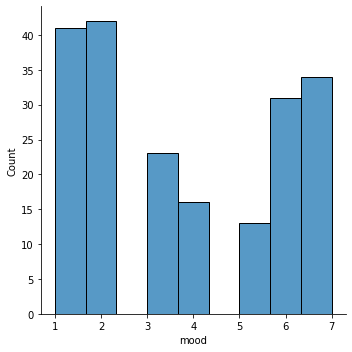

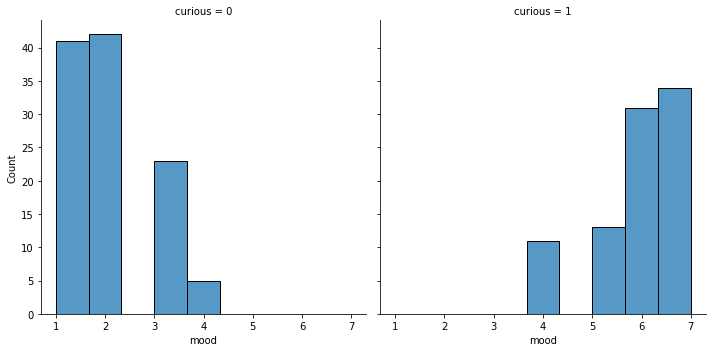

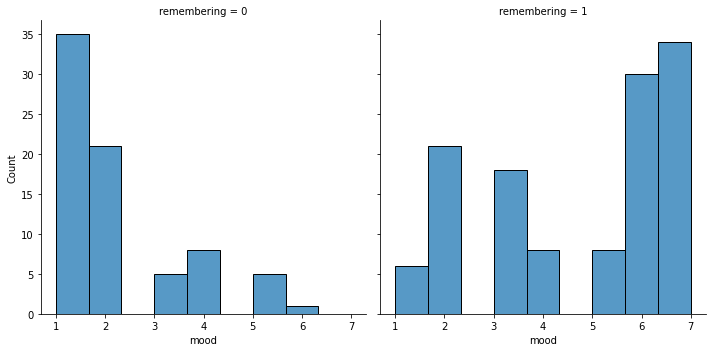

In [ ]:
# Create the histograms of curiosity split by remember
import seaborn as sns
import matplotlib.pyplot as plt 
sns.displot(data = df, x = 'mood')
sns.displot(data = df, x = 'mood', col = 'curious')
sns.displot(data = df, x = 'mood', col = 'remembering')

plt.show()

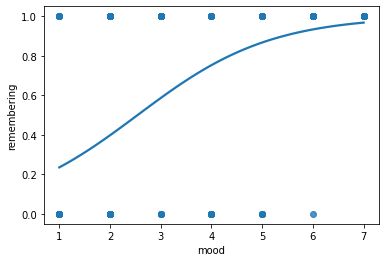

In [ ]:
model= sns.regplot(x ="mood", y='remembering', data = df, ci = None, logistic = True)



In [ ]:
log_mood = smf.logit("remembering ~ mood",
        data = df).fit()

log_mood.summary()


Optimization terminated successfully.
         Current function value: 0.463371
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.2996
Time:                        16:39:46   Log-Likelihood:                -92.674
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 5.399e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9416      0.353     -5.507      0.000      -2.633      -1.251
mood           0.7635      0.112      6.842      0.000       0.545       0.982
==============================================================================
"""

In [ ]:

#Let's convert this to odds ratio and interpret the model again. 
#remember the equation above:
#To convert the log odds coefficients and confidence intervals, we need to take the exponential of the values.


odds_ratio_mood = pd.DataFrame(np.exp(log_mood.params), columns= ['OR'])
odds_ratio_mood['z-value']= log_mood.tvalues
odds_ratio_mood['p-values']=log_mood.pvalues
odds_ratio_mood[['2.5%', '97.5%']] = np.exp(log_mood.conf_int())

odds_ratio_mood

,OR,z-value,p-values,2.5%,97.5%
Intercept,0.143473,-5.507143,3.647040e-08,0.071890,0.286333
mood,2.145823,6.841965,7.811418e-12,1.724268,2.670441


In [ ]:

log_cur_mood = smf.logit('remembering ~ mood + curious', data = df).fit()
log_cur_mood.summary()


Optimization terminated successfully.
         Current function value: 0.396307
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.4010
Time:                        16:40:09   Log-Likelihood:                -79.261
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 9.122e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6908      0.570     -6.471      0.000      -4.809      -2.573
mood           1.8070      0.271      6.666      0.000       1.276       2.338
curious       -4.4580      0.956     -4.663      0.000      -6.332      -2.584
==============================================================================
"""

In [ ]:
print(log_cur_mood.params)

Intercept   -3.690802
mood         1.807007
curious     -4.458031
dtype: float64


In [ ]:
odds_ratio_cur_mood = pd.DataFrame(np.exp(log_cur_mood.params), columns= ['OR'])
odds_ratio_cur_mood['z-value']= log_cur_mood.tvalues
odds_ratio_cur_mood['p-values']=log_cur_mood.pvalues
odds_ratio_cur_mood[['2.5%', '97.5%']] = np.exp(log_cur_mood.conf_int())
odds_ratio_cur_mood

,OR,z-value,p-values,2.5%,97.5%
Intercept,0.024952,-6.470694,9.755352e-11,0.008158,0.076317
mood,6.092186,6.666199,2.625138e-11,3.581277,10.363548
curious,0.011585,-4.662957,3.116979e-06,0.001779,0.075456


In [ ]:

log_cur_mood_interaction = smf.logit('remembering ~ mood + curious + mood:curious', data = df).fit()
log_cur_mood_interaction.summary()


Optimization terminated successfully.
         Current function value: 0.393584
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.4051
Time:                        16:40:26   Log-Likelihood:                -78.717
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 4.412e-23
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.2874      0.662     -4.962      0.000      -4.586      -1.989
mood             1.5968      0.324      4.926      0.000       0.961       2.232
curious         -6.8629      2.670     -2.571      0.010     -12.095      -1.631
mood:curious     0.6101      0.608      1.004      0.315      -0.581       1.802
================================================================================
"""

In [ ]:
odds_ratio_cur_mood_interaction = pd.DataFrame(np.exp(log_cur_mood_interaction.params), columns= ['OR'])
odds_ratio_cur_mood_interaction['z-value']= log_cur_mood_interaction.tvalues
odds_ratio_cur_mood_interaction[['2.5%', '97.5%']] = np.exp(log_cur_mood_interaction.conf_int())
odds_ratio_cur_mood_interaction['p-values']=log_cur_mood_interaction.pvalues
odds_ratio_cur_mood_interaction


,OR,z-value,2.5%,97.5%,p-values
Intercept,0.037351,-4.962352,0.010196,0.136835,6.964449e-07
mood,4.937400,4.925565,2.615435,9.320792,8.411685e-07
curious,0.001046,-2.570775,0.000006,0.195812,1.014714e-02
mood:curious,1.840704,1.003768,0.559210,6.058894,3.154905e-01


#**Assumptions:**

*   Response variable is binary 
*   Observations are independent
*   No multicollinearity among predictor variables
*   No extreme outliers
*   Large sample

The model does not need to fulfill the assumption of linearity, normality and homoscedasticity (conditions needed to be met to run a 'typical' linear regression).

**Follow-up:**

**Linearity:** in a OLS regression there is an assumption that the outcome has a linear relationship with the predictor. In logistic regression, this assumption is violated. However, it is assumed that there is a linear relationship between a continuous predictor and the log of the odds of the outcome variable.

Is the relationship between a predictor and its log transformation significant?

A way to test this is to plot the IV(s) in question and look for an S-shaped curve. The plot should have a flat-like top and bottom with an increase or decrease in the middle.
 

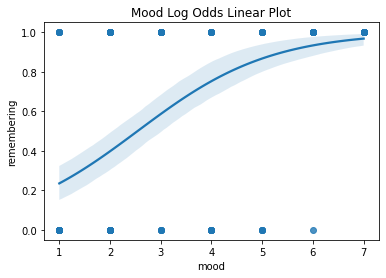

In [ ]:
#graphic representation
mood_log = sns.regplot(x= 'mood', y= 'remembering', data= df, logistic= True).set_title("Mood Log Odds Linear Plot")


In [ ]:
#Alternatively, we can test for collinearity by seeing if there is an interaction between a variable and its own logit
#We create new variable that is the log of the variable we want to test
#log_mood = log(mood)

mood1 = df['mood']
log_mood = np.log(mood1) 
df['log_mood'] = log_mood.tolist()

In [ ]:
# then add log_mood as an interaction term to a logistic model to assess linearity (mood:log_mood) 
#we are interested in whether the interaction term is significant (p < 0.05).
#any interaction that is significant has violated the assumption of linearity of the logit.

Collinearity_check = smf.logit('remembering ~ mood + mood:log_mood', data = df).fit()
Collinearity_check.summary()

Optimization terminated successfully.
         Current function value: 0.462445
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.3010
Time:                        16:41:57   Log-Likelihood:                -92.489
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 5.067e-18
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.6000      1.148     -2.265      0.023      -4.850      -0.350
mood              1.2830      0.863      1.486      0.137      -0.409       2.975
mood:log_mood    -0.2377      0.390     -0.610      0.542      -1.001       0.526
=================================================================================
"""

**Multicollinearity**
Predictors should not be too correlated. This can be checked with tolerance and VIF statistics.

In [ ]:
#look for high correlations or high Variance Inflation Factor (VIF) scores

df.corr()

,curious,remembering,mood,log_mood
curious,1.000000,0.402652,0.907546,0.856776
remembering,0.402652,1.000000,0.581146,0.600796
mood,0.907546,0.581146,1.000000,0.968171
log_mood,0.856776,0.600796,0.968171,1.000000


In [ ]:
#test fo Multicollinearity (VIF)

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('remembering ~ curious+mood', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,6.064011,Intercept
1,5.670217,curious
2,5.670217,mood


**Checking for outliers** 

You know the drill by now.

Be aware of how your model dummy codes your outcome variable. We need to make sure we get that right or we will see our results backwards.

**Confidence intervals** if you report them.

Again, these function as in other previous examples, and the way to interpret them is as we calculated confidence intervals 100 times, then these intervals would comprise of the  value of odds ratio in the population (rather than sample) in 95 of those samples. 

It is important that the confidence intervals do not cross 1. The interval should either be above 1 or below 1. 

##**Assessing model fit**

In linear regression, we use the $R^2$, the Pearson correlation, to assess fit between observed values of the outcome and the predicted values by the regression model.

Likewise, in the logistic regression, we can use the observed and predicted values to assess the fit of the model. The measure we use is the log-likelihood.

log-likelihood = $\sum\limits_{i=1}^{N} [y, ln(p(Y_i)) + (1 -Y_i)ln(1-P(y)]$

Summing the probabilities associated with the predicted and actual outcomes. How much unexplained information is there after the model has been fitted. 

The larger the value of log-likelihood, the more unexplained observations there are. We want a small log-likelihood. 

###**Use pseudo -$R^2$ to assess model fit**

The pseudo -$R^2$ is calculated with the same properties as OLS, just using the log-likelihood.

$$pseudo - R^2 = 1 - \frac {Log-Likelihood}{LL-Null}$$

Here, the Log-Likelihood is the maximum value for the model inclusive of the predictor, whereas the LL-null is the vallue of the model with only a constant. The ratio between the two compares the two models, if the ratio is small, this means that adding the predictor to the model is not improving the model much. 

###**Comparing models by accessing the difference in the log-likelihood ratio using the chi-square statistic**


$$\chi^2 =-2[LL_{null} -LL_{1}]$$

$$(df = k_{new} - k_{null})$$

The null model only has the constant included. We multipy by two to gives the result a chi-square distribution.

Degrees of freedom is always the parameters of the new model minus the parameters of the baseline model. So new model will have (number of predictors + constant) minus the 1 parameter of the baseline model (it only has the constant). 

In [ ]:
#Estimate a logit model 

#Define the a formula

formula = 'remembering ~ C(curious)'

#instantiate the logit model

model1 =smf.logit(formula, data = df)

#fit the instantiated model
logit1 = model1.fit()

display (logit1.summary())

Optimization terminated successfully.
         Current function value: 0.575618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                  0.1299
Time:                        16:57:28   Log-Likelihood:                -115.12
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 4.538e-09
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1989      0.191     -1.042      0.297      -0.573       0.175
C(curious)[T.1]     1.8773      0.348      5.393      0.000       1.195       2.559
===================================================================================
"""

In [ ]:
#grab ll-null from model with constant
basemodel_model = logit1.llnull

#calculate log-likelihood of model
base_ll = basemodel_model

print(base_ll)

-132.31264763563314


In [ ]:
# Mind the alias for statsmodel package has changed to 'sm' (previously was 'smf' as we were using formula notation) and the name of regression function switched to 'Logit' with capital L

#fit the 1 predictor model


#define response variable
y2 = df['remembering']

#define predictor variables
x2 = df[['curious']]

#add constant to predictor variables
x2 = sm.add_constant(x2)

#fit regression model
curious_model = sm.Logit(y2, x2).fit()

#calculate log-likelihood of model
one_ll = curious_model.llf

print(one_ll)


Optimization terminated successfully.
         Current function value: 0.575618
         Iterations 6
-115.12362213601334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(base_ll-one_ll)

print(LR_statistic)


#calculate p-value of test statistic using (the correct degrees of freedom)
p_val = scipy.stats.chi2.sf(LR_statistic, 1)

print(p_val)

34.378050999239605
4.538123160061458e-09


In [ ]:
#Then test whether the model with 2 predictors is significantly better than the one with 1 predictor

#define response variable
y1 = df['remembering']

#define predictor variables
x1 = df[['curious', 'mood']]

#add constant to predictor variables
x1 = sm.add_constant(x1)

#fit logistic regression model
two_pred_model = sm.Logit(y1, x1).fit()

#calculate log-likelihood of model
two_ll = two_pred_model.llf

print(two_ll)

Optimization terminated successfully.
         Current function value: 0.396307
         Iterations 7
-79.26134350903394


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic1 = -2*(one_ll - two_ll )

print(LR_statistic1)


#calculate p-value of test statistic using (the correct degrees of freedom)
p_val = scipy.stats.chi2.sf(LR_statistic1, 1)

print(p_val)


71.7245572539588
2.474338979065792e-17


So what are we making of these findings.

It seems that the difference in memory is largely determined by a difference in mood, moreso than curiosity. However, adding both predictors to the model makes for a significantly better model fit.

**So how can we interpret this?**

Because the original relationship between the independent (curiosity) and dependent (remembering) variable became **weaker** when the intervening variable (mood) was controlled for (added to the model), with the odds of remembering being 0.001 more when curious.

We could conclude that (1) the control variable (mood) **helps to explain the link** between the independent and dependent variables. 

Alternatively, we could conclude that (2) the control variable (mood) is a potential confounding variable, one that is producing a "fake" association between the independent and dependent variables. 

In such a situation, if the original relationship disappears when the control is applied, then we would conclude that the original relationship was non-existent, and it was really 'mood' that was driving the effect. 

It is a matter of interpreting the results and this requires us to reflect on how the variables might affect each other.

